In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
data = pd.read_csv('Pedestrian_volume__updated_monthly_.csv',parse_dates=['Date_Time'], date_parser=dateparse)

In [4]:
data.dtypes

ID                        int64
Date_Time        datetime64[ns]
Year                      int64
Month                    object
Mdate                     int64
Day                      object
Time                      int64
Sensor_ID                 int64
Sensor_Name              object
Hourly_Counts             int64
dtype: object

In [5]:
data.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,1,2009-05-01,2009,May,1,Friday,0,1,Bourke Street Mall (North),53
1,2,2009-05-01,2009,May,1,Friday,0,2,Bourke Street Mall (South),52
2,3,2009-05-01,2009,May,1,Friday,0,4,Town Hall (West),209
3,4,2009-05-01,2009,May,1,Friday,0,5,Princes Bridge,157
4,5,2009-05-01,2009,May,1,Friday,0,6,Flinders Street Station Underpass,139


In [6]:
data.tail()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
2509542,2509992,2018-12-31 23:00:00,2018,December,31,Monday,23,51,QVM-Franklin St (North),320
2509543,2509993,2018-12-31 23:00:00,2018,December,31,Monday,23,52,Elizabeth St-Lonsdale St (South),424
2509544,2509994,2018-12-31 23:00:00,2018,December,31,Monday,23,54,Lincoln-Swanston(West),59
2509545,2509995,2018-12-31 23:00:00,2018,December,31,Monday,23,56,Lonsdale St - Elizabeth St (North),269
2509546,2509996,2018-12-31 23:00:00,2018,December,31,Monday,23,58,Bourke St - Spencer St (North),671


In [7]:
data.shape

(2509547, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509547 entries, 0 to 2509546
Data columns (total 10 columns):
ID               int64
Date_Time        datetime64[ns]
Year             int64
Month            object
Mdate            int64
Day              object
Time             int64
Sensor_ID        int64
Sensor_Name      object
Hourly_Counts    int64
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 191.5+ MB


In [9]:
# Missing Values and their number
data.columns[data.isnull().any()] 

Nnull = data.isnull().sum()/len(data)*100
Nnull = Nnull[Nnull>0]
Nnull.sort_values(inplace=True, ascending=False)
print(Nnull)

Series([], dtype: float64)


In [10]:
data['Month'] = pd.Categorical(data['Month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                            'August', 'September', 'October', 'November','December'], ordered = True)

In [11]:
data.tail()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
2509542,2509992,2018-12-31 23:00:00,2018,December,31,Monday,23,51,QVM-Franklin St (North),320
2509543,2509993,2018-12-31 23:00:00,2018,December,31,Monday,23,52,Elizabeth St-Lonsdale St (South),424
2509544,2509994,2018-12-31 23:00:00,2018,December,31,Monday,23,54,Lincoln-Swanston(West),59
2509545,2509995,2018-12-31 23:00:00,2018,December,31,Monday,23,56,Lonsdale St - Elizabeth St (North),269
2509546,2509996,2018-12-31 23:00:00,2018,December,31,Monday,23,58,Bourke St - Spencer St (North),671


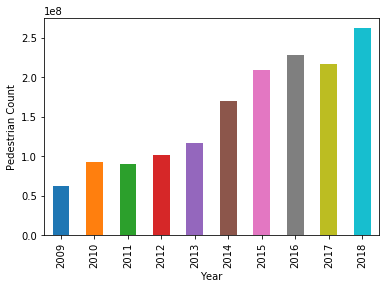

In [12]:
data.groupby('Year')['Hourly_Counts'].sum().plot.bar()
plt.ylabel('Pedestrian Count')
plt.show()

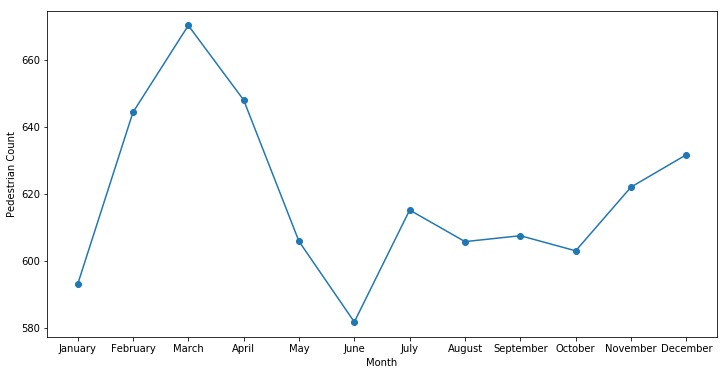

In [13]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November','December']
plt.figure(figsize=(12,6))
data.groupby('Month')['Hourly_Counts'].mean().plot(marker = 'o')
plt.xticks(np.arange(12), months)
plt.ylabel('Pedestrian Count')
plt.show()

In [14]:
data.groupby('Month')['Hourly_Counts'].mean()

Month
January      593.100837
February     644.379914
March        670.259792
April        648.050429
May          605.913290
June         581.888099
July         615.249834
August       605.835580
September    607.598174
October      603.094661
November     622.100821
December     631.742668
Name: Hourly_Counts, dtype: float64

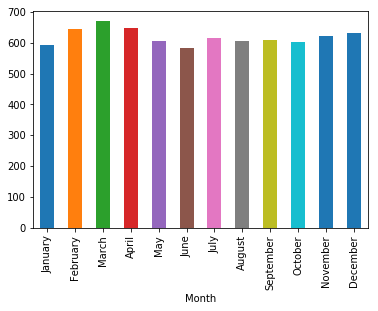

In [15]:
data.groupby('Month')['Hourly_Counts'].mean().plot.bar()

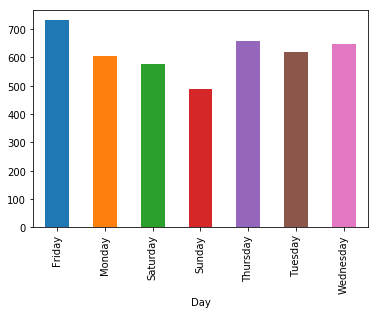

In [16]:
data.groupby('Day')['Hourly_Counts'].mean().plot.bar()

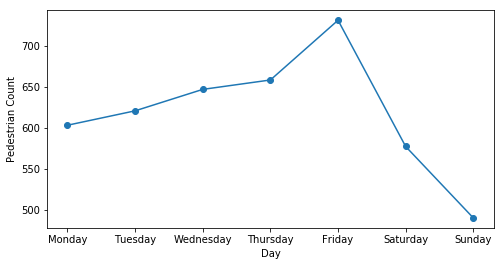

In [71]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
plt.figure(figsize=(8,4))
data.groupby('Day')['Hourly_Counts'].mean().plot(marker='o')
plt.xticks(np.arange(7), days)
plt.ylabel('Pedestrian Count')
plt.show()

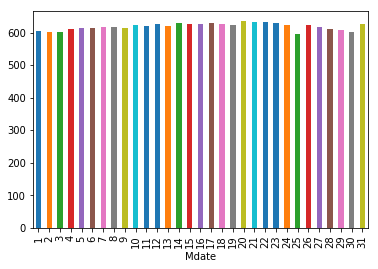

In [18]:
data.groupby('Mdate')['Hourly_Counts'].mean().plot.bar()

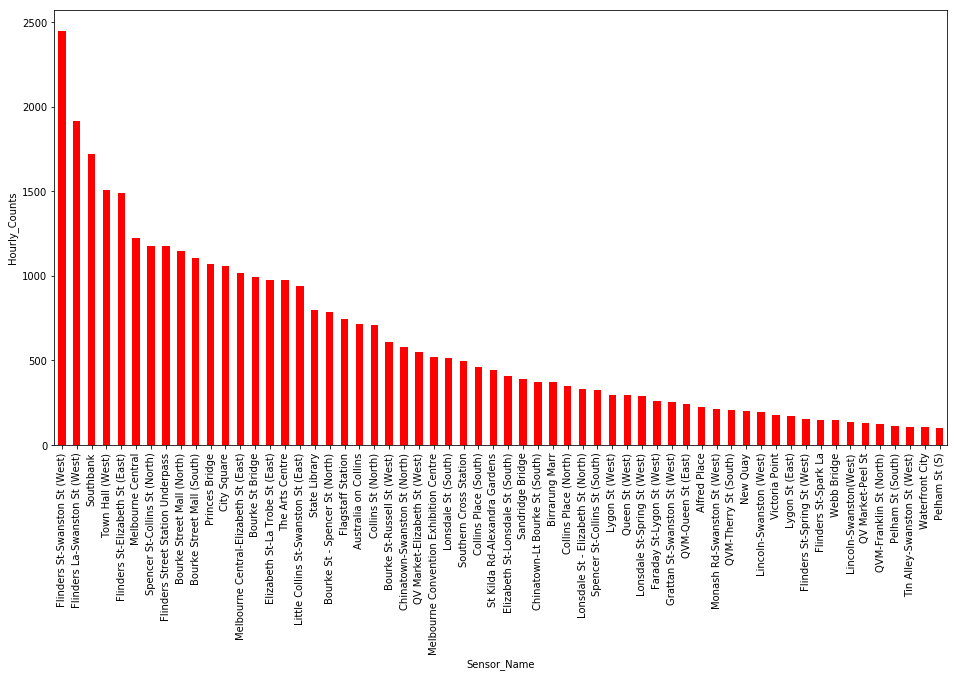

In [19]:
temp=data.groupby('Sensor_Name')['Hourly_Counts'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,8))
temp.plot(kind='bar',color='red')
plt.ylabel('Hourly_Counts')
plt.show()

In [20]:
import datetime
def applyer(row):
    if row == 'Saturday' or row == 'Sunday':
        return 1
    else:
        return 0

temp2 = data['Day'].apply(applyer)
data['weekend']=temp2

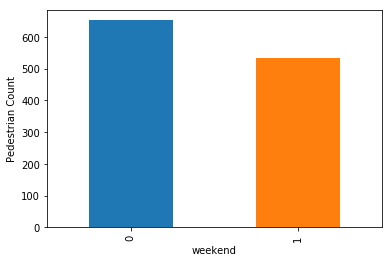

In [72]:
data.groupby('weekend')['Hourly_Counts'].mean().plot.bar()
plt.ylabel('Pedestrian Count')
plt.show()

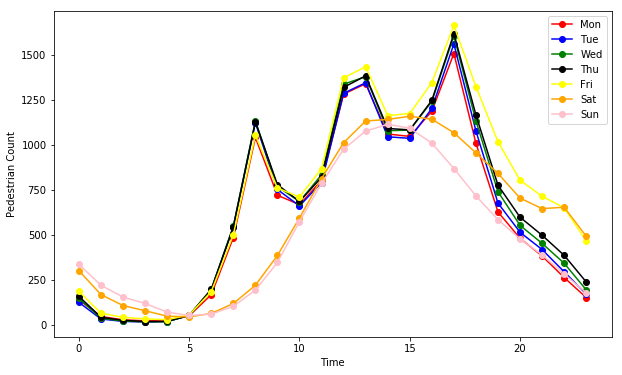

In [70]:
plt.figure(figsize=(10,6))
data.loc[data['Day'] == 'Monday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[data['Day'] == 'Tuesday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[data['Day'] == 'Wednesday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green',label = 'Wed')
data.loc[data['Day'] == 'Thursday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[data['Day'] == 'Friday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[data['Day'] == 'Saturday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[data['Day'] == 'Sunday'].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

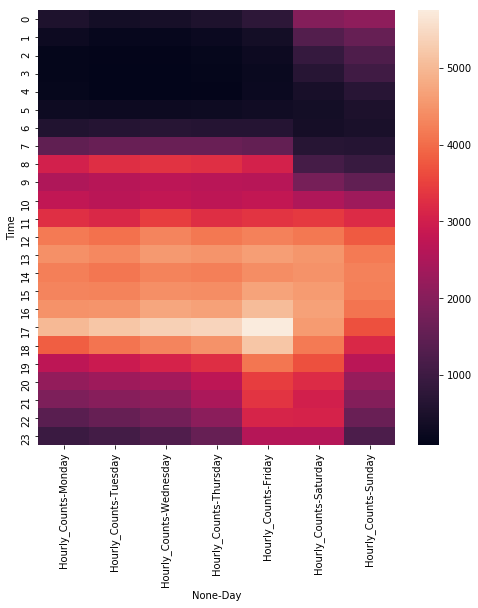

In [23]:
daytime = data[(data['Sensor_Name']=='Flinders St-Swanston St (West)') ][['Time','Day','Hourly_Counts']].groupby(['Time','Day']).mean().unstack('Day')
plt.figure(figsize=(8,8))
sns.heatmap(daytime)

In [24]:
sensor_location = pd.read_csv('Pedestrian_sensor_locations.csv')

In [25]:
sensor_location.head()

,Sensor ID,Sensor Name,Sensor Description,Status,Upload Date,Year Installed,Location Type,Geometry,Latitude,Longitude
0,3,Swa295_T,Melbourne Central,Installed,01/11/2018 11:41:02 AM +0000,2009,Outdoor,"(-37.81101523424893, 144.96429485172789)",-37.811015,144.964295
1,13,Wil277_T,Flagstaff Station,Installed,01/11/2018 11:41:02 AM +0000,2009,Outdoor,"(-37.81239678699153, 144.95652652844188)",-37.812397,144.956527
2,18,Col12_T,Collins Place (North),Installed,01/11/2018 11:40:57 AM +0000,2009,Outdoor,"(-37.81344861069189, 144.97305353863325)",-37.813449,144.973054
3,25,MCEC_T,Melbourne Convention Exhibition Centre,Installed,01/11/2018 11:41:02 AM +0000,2013,Outdoor,"(-37.82401775913522, 144.9560442639193)",-37.824018,144.956044
4,58,Bou688_T,Bourke St - Spencer St (North),Installed,01/11/2018 11:41:02 AM +0000,2018,Outdoor,"(-37.81686074252038, 144.95358075251028)",-37.816861,144.953581


In [26]:
sensor_location['Sensor_ID'] = sensor_location['Sensor ID']
sensor_location = sensor_location.drop(['Sensor ID', 'Sensor Description','Sensor Name', 'Status', 'Upload Date', 'Location Type', 'Geometry'], 1)

In [27]:
sensor_location.head()

,Year Installed,Latitude,Longitude,Sensor_ID
0,2009,-37.811015,144.964295,3
1,2009,-37.812397,144.956527,13
2,2009,-37.813449,144.973054,18
3,2013,-37.824018,144.956044,25
4,2018,-37.816861,144.953581,58


In [28]:
merge_data = data.merge(sensor_location, on = 'Sensor_ID')

In [29]:
locations = merge_data.groupby(['Sensor_Name','Sensor_ID', 'Latitude', 'Longitude'],as_index = False)['Hourly_Counts'].mean()

In [30]:
locations.head()

,Sensor_Name,Sensor_ID,Latitude,Longitude,Hourly_Counts
0,Alfred Place,39,-37.813797,144.969957,222.611175
1,Australia on Collins,16,-37.815734,144.965210,713.891454
2,Birrarung Marr,7,-37.818324,144.971415,371.348817
3,Bourke St - Spencer St (North),58,-37.816861,144.953581,784.879076
4,Bourke St Bridge,57,-37.817673,144.950256,992.759801


In [31]:
locations['Hourly_Counts'].describe()

count      60.000000
mean      610.815276
std       510.595622
min       101.489583
25%       212.295376
50%       425.150746
75%       974.151471
max      2448.780829
Name: Hourly_Counts, dtype: float64

In [32]:
import folium
def plot_location_count(locations):
    melbourne_map = folium.Map(location=[-37.814, 144.96332], zoom_start=14, tiles="OpenStreetMap")
    for index, row in locations.iterrows():
        lat = row['Latitude']
        long = row['Longitude']
        popup_text = """Hourly_Counts : {}<br>
                    Sensor Description : {}<br>"""
        popup_text = popup_text.format(row['Hourly_Counts'],row['Sensor_Name'])
        radius = row['Hourly_Counts']/100
        folium.CircleMarker(location = [lat, long], radius = radius, popup= popup_text, fill = True).add_to(melbourne_map)
    return melbourne_map

In [33]:
folium_map = plot_location_count(locations)
folium_map

In [34]:
folium_map.save("pic3.html")

In [35]:
merge_data.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,weekend,Year Installed,Latitude,Longitude
0,1,2009-05-01 00:00:00,2009,May,1,Friday,0,1,Bourke Street Mall (North),53,0,2009,-37.813494,144.965153
1,16,2009-05-01 01:00:00,2009,May,1,Friday,1,1,Bourke Street Mall (North),43,0,2009,-37.813494,144.965153
2,31,2009-05-01 02:00:00,2009,May,1,Friday,2,1,Bourke Street Mall (North),10,0,2009,-37.813494,144.965153
3,46,2009-05-01 03:00:00,2009,May,1,Friday,3,1,Bourke Street Mall (North),5,0,2009,-37.813494,144.965153
4,61,2009-05-01 04:00:00,2009,May,1,Friday,4,1,Bourke Street Mall (North),25,0,2009,-37.813494,144.965153


In [36]:
crash_data = pd.read_csv('Crashes_Last_Five_Years.csv')

In [37]:
crash_data.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,144.535609,-37.476504,3145907,T20130019206,ABS to receive accident,Finished,18/9/2013,09.15.00,No,Collision with vehicle,...,RURAL_VICTORIA,MACEDON RANGES,NORTHERN REGION,C,C,Arterial Other,Arterial Other,Undivided,Undiv,Country
1,144.946970,-37.846997,3145908,T20130019208,ABS to receive accident,Finished,16/9/2013,21.01.00,Yes,Collision with vehicle,...,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro
2,144.318699,-38.196891,3145909,T20130019604,ABS to receive accident,Finished,21/9/2013,14.40.00,Yes,Collision with vehicle,...,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,A,"A,C",Arterial Highway,"Arterial Highway,Arterial Other",Divided,"Div,Undiv",Country
3,145.158998,-37.804470,3145910,T20130019605,ABS to receive accident,Finished,23/9/2013,12.50.00,No,Collision with vehicle,...,MELB_URBAN,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undiv,Metro
4,144.797813,-37.701079,3145911,T20130019606,ABS to receive accident,Finished,23/9/2013,17.15.00,No,Collision with vehicle,...,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,Arterial Other,Divided,"Div,Undiv",Metro


In [38]:
crash_data_cbd = crash_data.loc[(crash_data['DEG_URBAN_ALL'] == 'MELBOURNE_CBD') & (crash_data['ACCIDENT_TYPE'] == 'Struck Pedestrian')]

In [39]:
# Missing Values and their number
crash_data_cbd.columns[crash_data_cbd.isnull().any()] 

Nnull = crash_data_cbd.isnull().sum()/len(crash_data_cbd)*100
Nnull = Nnull[Nnull>0]
Nnull.sort_values(inplace=True, ascending=False)
print(Nnull)

SRNS_ALL       100.000000
SRNS           100.000000
DAY_OF_WEEK      2.617801
DIVIDED_ALL      1.047120
DIVIDED          1.047120
RMA_ALL          1.047120
RMA              1.047120
dtype: float64


In [40]:
crash_data_cbd = crash_data_cbd.drop(['SRNS_ALL', 'SRNS', 'ACCIDENT_TYPE', 'DEG_URBAN_ALL'],1)

In [41]:
crash_data_cbd = crash_data_cbd.drop(['X','Y','LGA_NAME', 'REGION_NAME', 'DEG_URBAN_NAME', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'RMA', 'RMA_ALL'],1)

In [42]:
crash_data_cbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 374 to 71782
Data columns (total 52 columns):
OBJECTID             191 non-null int64
ACCIDENT_NO          191 non-null object
ABS_CODE             191 non-null object
ACCIDENT_STATUS      191 non-null object
ACCIDENT_DATE        191 non-null object
ACCIDENT_TIME        191 non-null object
ALCOHOLTIME          191 non-null object
DAY_OF_WEEK          186 non-null object
DCA_CODE             191 non-null object
HIT_RUN_FLAG         191 non-null object
LIGHT_CONDITION      191 non-null object
POLICE_ATTEND        191 non-null object
ROAD_GEOMETRY        191 non-null object
SEVERITY             191 non-null object
SPEED_ZONE           191 non-null object
RUN_OFFROAD          191 non-null object
NODE_ID              191 non-null int64
LONGITUDE            191 non-null float64
LATITUDE             191 non-null float64
NODE_TYPE            191 non-null object
VICGRID_X            191 non-null float64
VICGRID_Y            191 non-

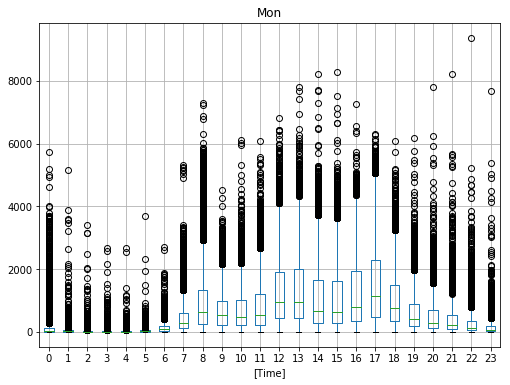

In [43]:
data.loc[data['Day'] == 'Monday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6) )
plt.title('Mon')
plt.suptitle("")
plt.show()

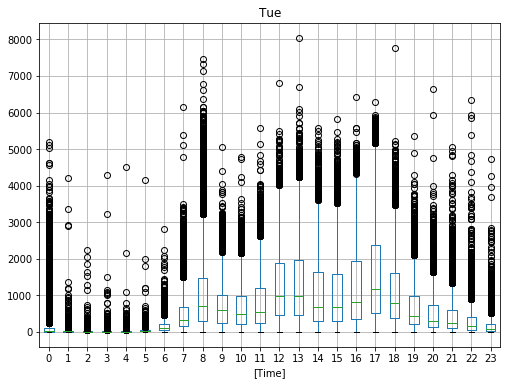

In [44]:
data.loc[data['Day'] == 'Tuesday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Tue')
plt.suptitle("")
plt.show()

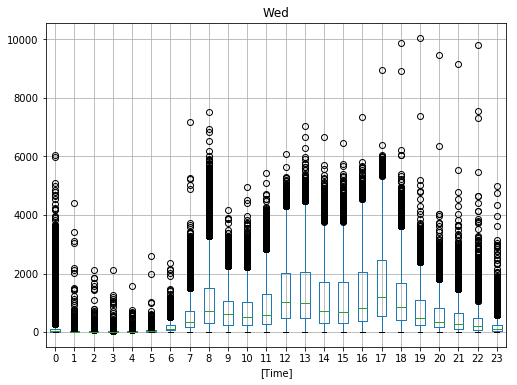

In [45]:
data.loc[data['Day'] == 'Wednesday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Wed')
plt.suptitle("")
plt.show()

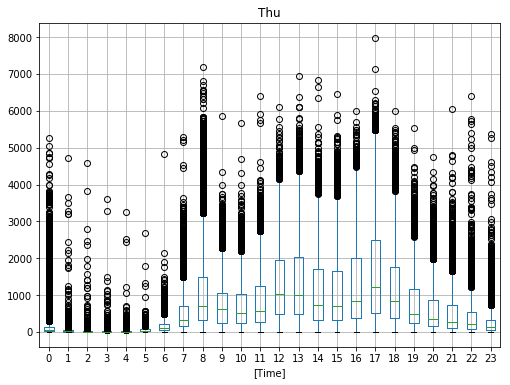

In [46]:
data.loc[data['Day'] == 'Thursday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Thu')
plt.suptitle("")
plt.show()

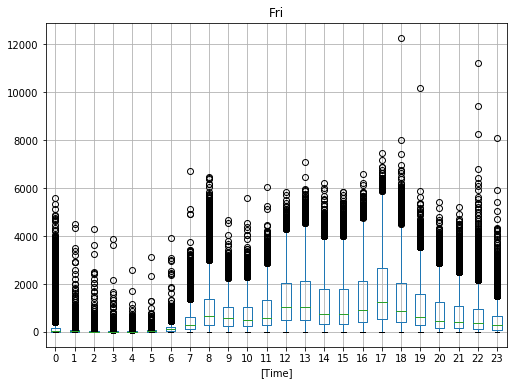

In [47]:
data.loc[data['Day'] == 'Friday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Fri')
plt.suptitle("")
plt.show()

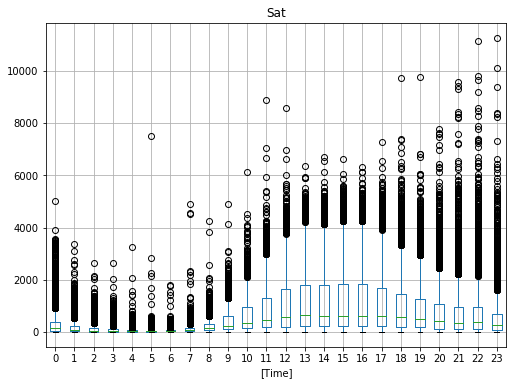

In [48]:
data.loc[data['Day'] == 'Saturday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Sat')
plt.suptitle("")
plt.show()

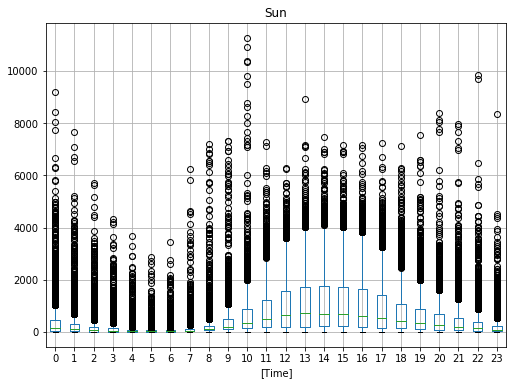

In [49]:
data.loc[data['Day'] == 'Sunday'].boxplot(column = ['Hourly_Counts'], by = ['Time'], figsize = (8,6))
plt.title('Sun')
plt.suptitle("")
plt.show()

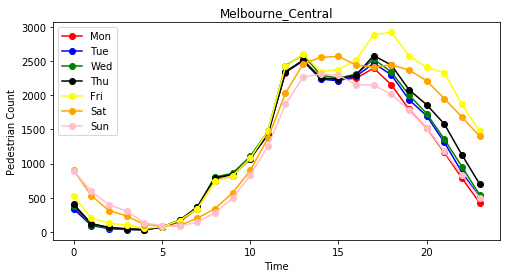

In [73]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & (data['Sensor_Name'] == 'Melbourne Central') ].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & (data['Sensor_Name'] == 'Melbourne Central')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Melbourne_Central')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

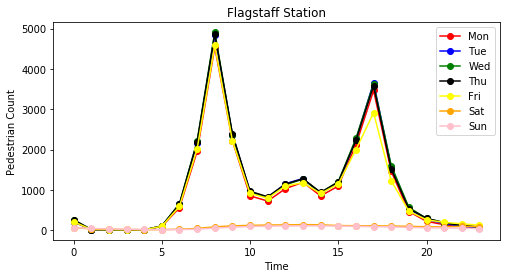

In [74]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & (data['Sensor_Name'] == 'Flagstaff Station') ].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & (data['Sensor_Name'] == 'Flagstaff Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Flagstaff Station')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

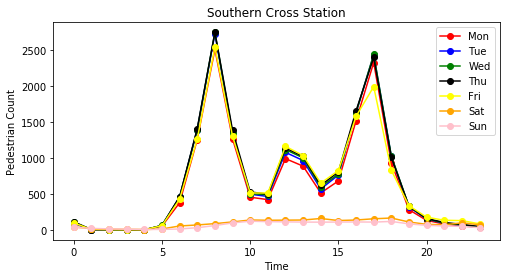

In [75]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & (data['Sensor_Name'] == 'Southern Cross Station') ].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & (data['Sensor_Name'] == 'Southern Cross Station')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Southern Cross Station')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

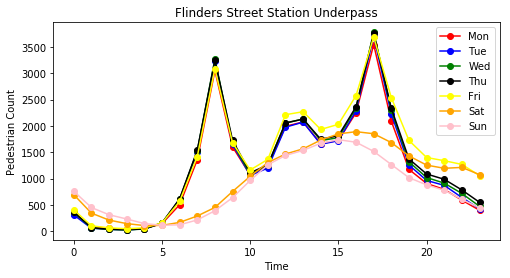

In [76]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass') ].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & (data['Sensor_Name'] == 'Flinders Street Station Underpass')].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Flinders Street Station Underpass')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

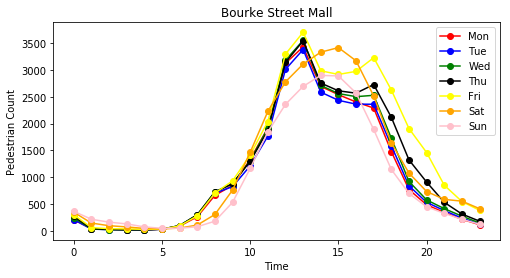

In [77]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)') | (data['Sensor_Name'] == 'Bourke Street Mall (South)')) ].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & ((data['Sensor_Name'] == 'Bourke Street Mall (North)')| (data['Sensor_Name'] == 'Bourke Street Mall (South)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Bourke Street Mall')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

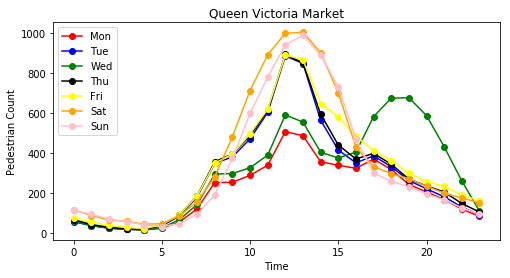

In [78]:
plt.figure(figsize=(8,4))
data.loc[(data['Day'] == 'Monday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Mon')
data.loc[(data['Day'] == 'Tuesday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'blue', label = 'Tue')
data.loc[(data['Day'] == 'Wednesday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'green', label = 'Wed')
data.loc[(data['Day'] == 'Thursday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'black', label = 'Thu')
data.loc[(data['Day'] == 'Friday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'yellow', label = 'Fri')
data.loc[(data['Day'] == 'Saturday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'orange', label = 'Sat')
data.loc[(data['Day'] == 'Sunday') & ((data['Sensor_Name'] == 'QV Market-Peel St') | (data['Sensor_Name'] == 'QV Market-Elizabeth St (West)') | (data['Sensor_Name'] == 'QVM-Queen St (East)')| (data['Sensor_Name'] == 'QVM-Therry St (South)')| (data['Sensor_Name'] == 'QVM-Franklin St (North)'))].groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'pink', label = 'Sun')
plt.title('Queen Victoria Market')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

In [56]:
crash_data_cbd['ACCIDENT_DATE'] = pd.to_datetime(crash_data_cbd.ACCIDENT_DATE,format='%d/%m/%Y') 

In [57]:
crash_data_cbd['year']=crash_data_cbd.ACCIDENT_DATE.dt.year 
crash_data_cbd['month']=crash_data_cbd.ACCIDENT_DATE.dt.month 
crash_data_cbd['day']=crash_data_cbd.ACCIDENT_DATE.dt.day

In [58]:
crash_data_cbd.tail()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,year,month,day
70302,3208925,T20180005008,ABS to receive accident,Finished,2018-03-15,22.06.00,Yes,Thursday,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,No,...,0,0,0,0,Undivided,Undiv,Metro,2018,3,15
70782,3209405,T20180010599,ABS to receive accident,Finished,2018-06-05,14.30.00,No,Tuesday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,Not known,...,0,0,0,0,Undivided,Undiv,Metro,2018,6,5
70953,3209576,T20180009313,ABS to receive accident,Finished,2018-05-17,12.05.00,No,Wednesday,PED EMERGES FROM IN FRONT OF PARKED OR STATION...,No,...,0,1,0,0,Undivided,Undiv,Metro,2018,5,17
71486,3214109,T20180016274,ABS to receive accident,Finished,2018-08-29,08.15.00,No,Wednesday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,...,0,0,1,0,Undivided,Undiv,Metro,2018,8,29
71782,3214405,T20180021570,ABS to receive accident,Finished,2018-11-18,01.00.00,No,NaN,FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT,No,...,0,1,0,0,Undivided,Undiv,Metro,2018,11,18


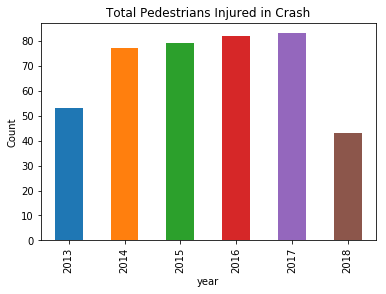

In [79]:
crash_data_cbd.groupby('year')['TOTAL_PERSONS'].sum().plot.bar()
plt.ylabel('Count')
plt.title('Total Pedestrians Injured in Crash')
plt.show()

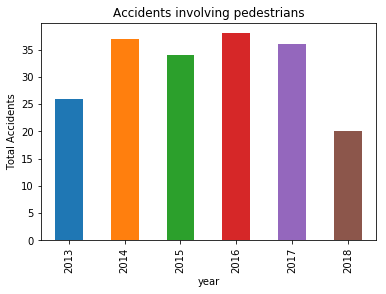

In [60]:
crash_data_cbd.groupby('year')['ACCIDENT_NO'].count().plot.bar()
plt.ylabel('Total Accidents')
plt.title('Accidents involving pedestrians')
plt.show()

In [61]:
temp4 = data.copy()

In [62]:
temp4['date'] = pd.to_datetime(temp4['Date_Time']).dt.date

In [63]:
temp4.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,weekend,date
0,1,2009-05-01,2009,May,1,Friday,0,1,Bourke Street Mall (North),53,0,2009-05-01
1,2,2009-05-01,2009,May,1,Friday,0,2,Bourke Street Mall (South),52,0,2009-05-01
2,3,2009-05-01,2009,May,1,Friday,0,4,Town Hall (West),209,0,2009-05-01
3,4,2009-05-01,2009,May,1,Friday,0,5,Princes Bridge,157,0,2009-05-01
4,5,2009-05-01,2009,May,1,Friday,0,6,Flinders Street Station Underpass,139,0,2009-05-01


In [64]:
holidays_list = pd.read_csv('holiday.csv')
holidays_list['Date'] = pd.to_datetime(holidays_list['Date']).dt.date

In [65]:
holiday_data = temp4[temp4['date'].isin(holidays_list['Date'])]

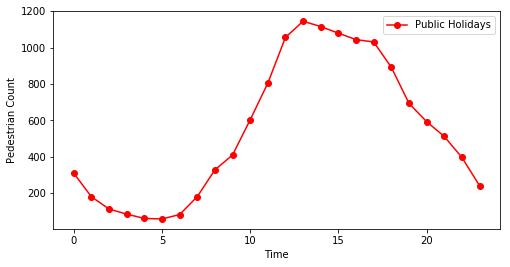

In [80]:
plt.figure(figsize=(8,4))
holiday_data.groupby('Time')['Hourly_Counts'].mean().plot(marker = 'o', color = 'red', label = 'Public Holidays')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()